<a href="https://colab.research.google.com/github/Muetzilla/KME_Informatikunterricht/blob/main/woche_5/RSA_Verfahren_V4f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Asymmetrische Verschlüsselung mit RSA
Sie haben bereits die Verschlüsselungs- und Entschlüsselungsfunktionen des RSA Verfahrens implementiert. Diese können Sie im Folgenden verwenden. Kopieren Sie diese dazu in die nächsten Code-Zellen. Falls Ihre Funktionen nicht funktionieren, können Sie die bereits vorhandenen Funktionen verwenden.

In [1]:
def encryption_rsa(text, public_key):
    """
    Verschlüssele `text` gemäss RSA-Verfahren mit dem
    `public_key` der als Input geliefert wird.
    """
    e, n = public_key
    # Unser Ergebnis für den verschlüsselten Text
    verschluesselter_text = ""
    # Verschlüssele jeden Buchstaben einzeln
    # Nimm einen Buchstaben nach dem anderen aus dem Text
    for buchstabe in text:
        # Wandle den Buchstaben in seinen ASCII-Code um
        m = ord(buchstabe)
        # Berechne eine neuen Code (Verschlüsselung)
        c = (m ** e) % n
        # Finde das ASCII-Zeichen für den neuen Code
        neuer_buchstabe = chr(c)
        # Hänge den neuen Buchstaben an das Ergebnis an
        verschluesselter_text = verschluesselter_text + neuer_buchstabe
    return verschluesselter_text


def decryption_rsa(text, private_key):
    """
    Entschlüssle nach dem RSA-Verfahren den `text`
    mit dem Schlüssel `private_key`
    """
    d, n = private_key
    # Das Ergebnis für den entschlüsselten Text
    entschluesselter_text = ""
    # Entschlüssele ein Zeichen nach dem anderen
    for buchstabe in text:
        # Wandle den Buchstaben in seinen ASCII-Code um
        c = ord(buchstabe)
        # Berechne den neuen Code
        m = (c ** d) % n
        # Finde das ASCII-Zeichen für den neuen Code
        neuer_buchstabe = chr(m)
        # Hänge den neuen Buchstaben an das Ergebnis an
        entschluesselter_text = entschluesselter_text + neuer_buchstabe
    return entschluesselter_text

### Anwendung dieser Funktionen



In [2]:
# Schlüssel müssen gegeben sein
public_key = (65537, 13837)
private_key = (13473, 13837)

print("Public Key:", public_key)
print("Private Key:", private_key)

# Der Klartext
text = "Hallo Bob"

# Der Geheimtext
verschluesselter_text = encryption_rsa(text, public_key)

# Der entschlüsselte Geheimtext
entschluesselter_text = decryption_rsa(verschluesselter_text, private_key)

# Ausgabe für den Vergleich
print("Ursprungstext       : ", text)
print("Verschlüsselter Text: ", verschluesselter_text)
print("Entschlüsselter Text: ", entschluesselter_text)

# Vergleich
if text == entschluesselter_text:
    print("Der Text und der entschlüsselte Text sind identisch.")
else:
    print("Der Text und der entschlüsselte Text sind nicht identisch.")

Public Key: (65537, 13837)
Private Key: (13473, 13837)
Ursprungstext       :  Hallo Bob
Verschlüsselter Text:  ᷢ᫙⬤⬤ԫ㌣ᶣԫˋ
Entschlüsselter Text:  Hallo Bob
Der Text und der entschlüsselte Text sind identisch.


## RSA Schlüssel generieren

Wie werden Schlüssel-Paare generiert? Hierfür gibt es einen Algorithmus, der im Folgenden beschrieben wird. Implementieren Sie den Algorithmus. Sie benötigen dazu zwei Hilfsfunktionen, welche gegeben sind. Verwenden Sie diese.

**Aufgabe:**
- Implementieren Sie die Schlüsselerzeugung für das RSA-Verfahren nach dem unten angegebenen Algorithmus.
- Erzeugen Sie anschliessend ein Schlüsselpaar und verwenden Sie dieses um einen beliebigen Text aus dem Internet zu verschlüsseln und entschlüsseln. Vergleichen Sie den entschlüsselten Text mit dem Ursprungstext und überprüfen Sie ob alle Zeichen korrekt wiedergegeben werden.

### Der Algorithmus
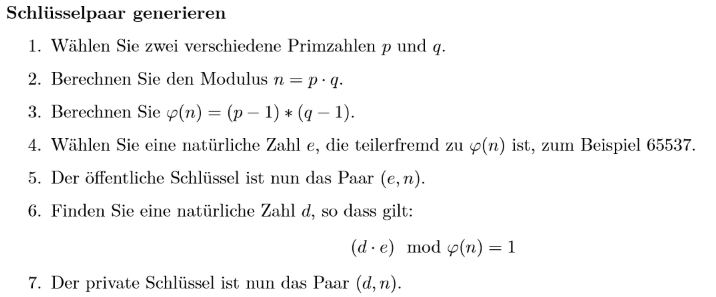




### Hilfsfunktionen
Sie können die unten gegebenen Hilfsfunktionen für die Berechnung des "modularen Inversen" einer Zahl verwenden. Sie benötigen diese Funktion, um die Zahl $d$ im Schritt 6 zu finden.

Ein Beispiel, wie sie diese Funktion verwenden finden Sie unten.

In [3]:
def extended_euclidean(a, b):
    """Berechnet ggT(a, b) sowie x und y mit ax + by = ggT"""
    if b == 0:
        return a, 1, 0
    else:
        gcd, x1, y1 = extended_euclidean(b, a % b)
        x = y1
        y = x1 - (a // b) * y1
        return gcd, x, y

def mod_inverse(e, phi_n):
    """Berechnet das modulare Inverse von e modulo phi_n"""
    gcd, x, _ = extended_euclidean(e, phi_n)
    if gcd != 1:
        raise ValueError(f"Kein modulares Inverses, da ggT({e}, {phi_n}) ≠ 1")
    else:
        return x % phi_n  # mod phi_n, falls x negativ ist



In [4]:
# Beispiel: e = 7, phi = 40
# Bestimme das modulare Inverse von e bezüglich phi
e = 7
phi = 40
d = mod_inverse(e, phi)
print(f"Das modulare Inverse von {e} mod {phi} ist d = {d}")

Das modulare Inverse von 7 mod 40 ist d = 23


Unsere Verschlüsselungs- und Entschlüsselungs-Funktionen vom letzten Mal:

### Ihre Lösung
- Implementieren Sie die Funktion `generate_rsa_keys' für die Schlüsselgenerierung gemäss dem oben angegebenen Algorithmus
- Modifizieren Sie den unten angegebenen Code entsprechend



In [5]:
def generate_rsa_keys(p, q):
    """
    Erzeuge ein Schlüsselpaar für das RSA-Verschlüsselungsverfahren.
    Für die Berechnung werden zwei Primzahlen `p` und `q` benötigt.
    """
    n = p * q
    phiOfN = (p -1) * (q -1)
    e = 65537
    d = mod_inverse(e, phiOfN)
    public_key = (e, n)
    private_key = (d, n)

    return public_key, private_key


In [10]:
generate_rsa_keys(97,17)

((65537, 1649), (1025, 1649))

### Test und Verwendung
- Testen und verwenden Sie ihre Funktion
- Sie benötige zwei Primzahlen
- Verwenden Sie zwei Primzahlen zwischen 100 und 200
- Für die Primzahlsuche kann die folgende Funktion verwendet werden

In [7]:
def ist_primzahl(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    # Nur ungerade Teiler bis zur Quadratwurzel prüfen
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

- **Aufgabe:** Generieren sie alle Primzahlen zwischen 100 und 200 und wählen Sie zwei aus

In [15]:
# Hier kommt Ihr Code
import random
def getTwoPrimes():
  primes = []
  for i in range(100, 201):
    if ist_primzahl(i):
      primes.append(i)

  firstIndex = random.randint(0, len(primes) - 1)
  secondIndex = random.randint(0, len(primes) - 1)
  selectedPrimes = (primes[firstIndex], primes[secondIndex])
  return selectedPrimes


- **Aufgabe:** Ein erster Test: Verwenden Sie "Ihre" Primzahlen indem Sie den folgenden Code modifizieren. Funktioniert die Verschlüsselung damit?

In [25]:
# Die gewählten Primzahlen sind
p,q = getTwoPrimes()
print(p)
print(q)

# Generierung der Schlüssel
public_key, private_key = generate_rsa_keys(p, q)

print("Public Key:", public_key)
print("Private Key:", private_key)

# Der Klartext
text = "Hallo Bob"

# Der Geheimtext
verschluesselter_text = encryption_rsa(text, public_key)

# Der entschlüsselte Geheimtext
entschluesselter_text = decryption_rsa(verschluesselter_text, private_key)

# Ausgabe für den Vergleich
print("Ursprungstext       : ", text)
print("Verschlüsselter Text: ", verschluesselter_text)
print("Entschlüsselter Text: ", entschluesselter_text)

# Vergleich
if text == entschluesselter_text:
    print("Der Text und der entschlüsselte Text sind identisch.")
else:
    print("Der Text und der entschlüsselte Text sind nicht identisch.")

199
139
Public Key: (65537, 27661)
Private Key: (3365, 27661)
Ursprungstext       :  Hallo Bob
Verschlüsselter Text:  ䷫گ⺁⺁劚喺叱劚巌
Entschlüsselter Text:  Hallo Bob
Der Text und der entschlüsselte Text sind identisch.


- Ein zweiter Test soll einen etwas längerem Text aus Wikipedia verwenden.

In [26]:
klartext = """Als Partherkriege werden die militärischen Konflikte zwischen dem Römischen Reich und dem Partherreich zwischen dem späten 1. Jahrhundert v. Chr. und dem frühen 3. Jahrhundert n. Chr. bezeichnet. Nach dem Sturz der Parther 224 bzw. 226 n. Chr. setzten sich die militärischen Auseinandersetzungen zwischen Rom bzw. Ostrom und dem Sassanidenreich noch bis ins 7. Jahrhundert fort (siehe Römisch-Persische Kriege).

In fast allen Partherkriegen ging die Aggression vor allem von römischer Seite aus. Die ersten Partherkriege im 1. Jahrhundert v. Chr. resultierten aus der expansiven Außenpolitik im Rahmen der damaligen innerrömischen Machtkämpfe und führten zum 53 v. Chr. katastrophal gescheiterten Feldzug des Marcus Licinius Crassus und 36 v. Chr. zum abgebrochenen Partherfeldzug des Marcus Antonius. Auslöser der meisten folgenden Partherkriege war der Status von Armenien, das zwischen beiden Großmächten umstritten war. Der Vertrag von Rhandeia im Jahr 63 n. Chr. etablierte eine Nebenlinie des parthischen Königshauses der Arsakiden in Armenien, das nun aber formal unter römischer Oberherrschaft stand. Trajan nutzte die Absetzung des von Rom geduldeten armenischen Königs Axidares als Vorwand für seinen Partherfeldzug (114 bis 117). Dieser verlief zwar sehr erfolgreich mit großen Eroberungen, die sich aber 116/17 als nicht haltbar erwiesen, so dass Rom nach Trajans Tod die neuen Eroberungen im Osten aufgab. Der sogenannte Partherkrieg des Lucius Verus von 161/62 bis 166 resultierte aus dem parthischen Versuch, Armenien wieder vollständig unter Kontrolle zu bringen, was aber mit einer Niederlage für die Parther endete. Die beiden Partherfeldzüge des Septimius Severus in den Jahren 195 und 197/98 waren begrenzte Militäroperationen, die erfolgreich verliefen, wobei die Römer wie so oft von innerparthischen Unruhen profitierten. Der geplante Partherfeldzug Caracallas 216/17 war ebenfalls der Versuch, Druck auf Parthien auszuüben, der Feldzug hatte zum Zeitpunkt von Caracallas Ermordung aber noch nicht wirklich begonnen."""

- **Aufgabe**: Aus wie vielen Zeichen besteht dieser Text? Finden Sie es heraus.

In [27]:
print(len(klartext))

2040


- Funktioniert die Verschlüsselung und Entschlüsselung?
- Wie lange dauert es bis der Text ver- und entschlüsselt wird?
- Dies kann mit dem Folgenden Code getestet werden
- **Aufgabe:** Lassen Sie den Code laufen und bestimmen Sie die Ausführungszeit.Verwenden Sie allenfalls "Ihre" Primzahlen, indem Sie den Code ändern. Können Sie wiedergeben, was der Code macht?

In [28]:
# Die gewählten Primzahlen
p,q = getTwoPrimes()

# Generierung der Schlüssel
public_key, private_key = generate_rsa_keys(p, q)

In [29]:
%%time
# Verschlüsselung und Entschlüsselung
neuer_klartext = decryption_rsa(encryption_rsa(klartext, public_key), private_key)


CPU times: user 39.7 s, sys: 0 ns, total: 39.7 s
Wall time: 40 s


In [30]:
# Vergleich
if text == entschluesselter_text:
    print("Der Text und der entschlüsselte Text sind identisch.")
else:
    print("Der Text und der entschlüsselte Text sind nicht identisch.")


Der Text und der entschlüsselte Text sind identisch.


### RSA-Verschlüsselung für Fortgeschrittene
Ist Dir aufgefallen ...
- Die RSA-Verschlüsselung und die RSA-Entschlüsselung verwenden denselben Algorithmus, nur andere Schlüssel.

Damit reicht es eine Funktion zu programmieren. Sie kann sowohl für die Verschlüsselung als auch für die Entschlüsselung verwendet werden.

In [ ]:
def rsa(text, key):
    """
    RSA-Verfahren für Ver- und Entschlüsselung
    """
    f, n = key
    new_text = ""
    for letter in text:
        u = ord(letter)
        q = (u ** f) % n
        new_letter = chr(q)
        new_text += new_letter
    return new_text

In [ ]:
old = "Hallo Bob"
p = 101
q = 137
public_key, private_key = generate_rsa_keys(p, q)

secret = rsa(old, public_key)
new = rsa(secret, private_key)

print(old)
print(secret)
print(new)
print(new == old)
